<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [2]:
n_obs = 10**6

pois_rv = sts.poisson(2)

x = pois_rv.rvs(n_obs)

k = 0

for i in x:
    if i < 6:
        k += 1
ans1 = k / n_obs   

In [3]:
uslovie2 = x > 5
success2 = x[uslovie2] > 6
ans2 = np.sum(success2) / np.sum(uslovie2)

In [4]:
success3 = x == 6
ans3 = np.sum(success3) / n_obs

In [5]:
ans4 = np.mean(x**3)

In [6]:
uslovie5 = x > 5
success5 = x[uslovie5]
ans5 = np.mean(success5)

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans1 = ...
ans2 = ...
ans3 = ...
ans4 = ...
ans5 = ...

# your code here


In [8]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

# Похожие тесты скрыты от вас

TypeError: unsupported operand type(s) for -: 'ellipsis' and 'float'

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [9]:
uniform_rv = sts.uniform(1, 2)

t_1 = uniform_rv.rvs(n_obs)
t_2 = uniform_rv.rvs(n_obs)

exp_rv = sts.expon(0.3)

t = exp_rv.rvs(n_obs)
print(t_1[:5])
print(t_2[:5])
print(t[:5])

[2.91739938 1.58306315 2.4330634  1.20563385 1.88955819]
[1.95589934 1.23430451 1.24699141 1.50199008 2.51369695]
[1.98176565 1.74282139 3.53860294 3.00926619 0.74453865]


In [10]:
np.mean(t_1)

np.float64(2.000720183018859)

In [11]:
n, k = 0, 0
for i in range(n_obs):
    if (t[i] < t_2[i] and t[i] > t_1[i]) or (t[i] < t_2[i] and t[i] > t_1[i]):
        n += 1
        if t[i] <= 1.5:
            k += 1
print(k / n / 2)

0.1408528157186808


In [12]:
uslovie_pad = (t > t_2 and t < t_1) or (t < t_2 and t > t_1)

seccess_pad = t[uslovie_pad] <= 1.5
np.sum(success_pad) / np.sum(uslovie_pad)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

ans6 = ...

# your code here


In [ ]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [15]:
theta = 10
alpha = 2
x = sts.uniform(1, theta - 1).rvs(n_obs)
fx = [0] * n_obs
ln_theta = np.log(theta)
for i in range(n_obs):
    fx[i] = ((np.log(x[i]) / ln_theta) ** alpha)
ans7 = np.mean(fx)
print(ans7)
# your code here


0.5233624136377935


Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

In [32]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
plt.hist(fx, bins = 50)
<matplotlib.axes._subplots.AxesSubplot at 0x7f41cbf66c40>

SyntaxError: invalid syntax (1862973353.py, line 4)

C:\Users\qazws\AppData\Local\Temp\ipykernel_4852\2810151767.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fx, bins = 50)


<Axes: ylabel='Density'>

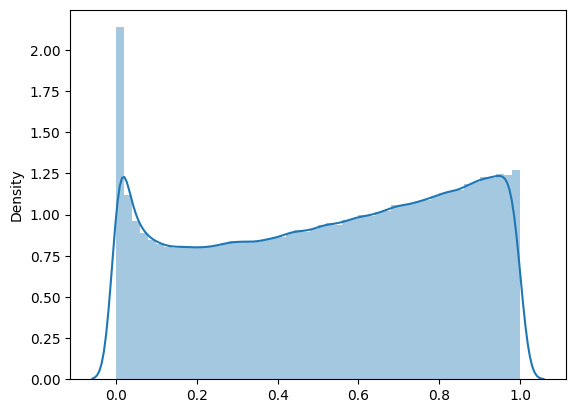

In [35]:
sns.distplot(fx, bins = 50)

<Axes: ylabel='Density'>

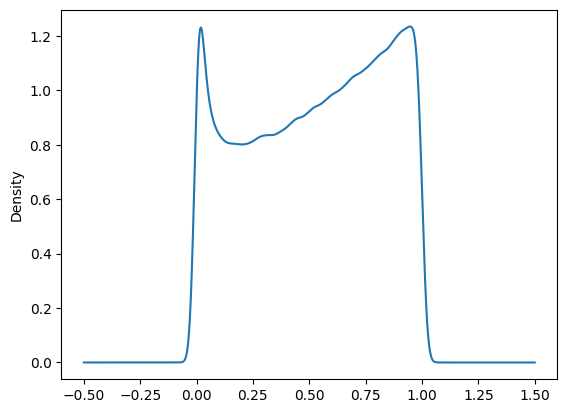

In [31]:
s = pd.Series(fx)
s.plot.kde()

In [ ]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you